In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [6]:
# import the dataset from specified location
data=pd.read_csv('E:/Datascience/Datasets/CCPP/csv/Folds5x2_pp.csv')

In [7]:
data.shape

(9568, 5)

In [8]:
# showing the data from top 5
data.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

In [9]:
# showing the data from bottom 5
data.tail()

AT      V       AP     RH      PE
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

In [10]:
# Print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
# Computes a summary of statistics pertaining to the DataFrame columns
data.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

In [12]:
# It returns the number of 
# missing values in the data set
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [13]:
data.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

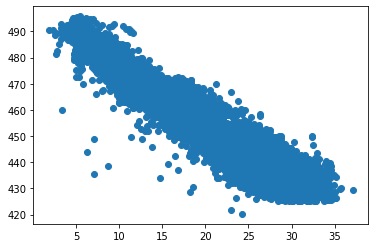

In [14]:
# draw a scatter plot diagram
# The x-axis represents AT, and the y-axis represents PE.
plt.scatter(data['AT'],data['PE'])

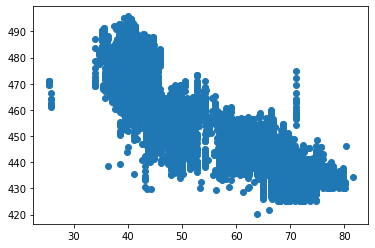

In [15]:
# draw a scatter plot diagram
# The x-axis represents V, and the y-axis represents PE.
plt.scatter(data['V'],data['PE'])

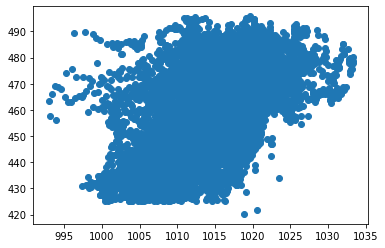

In [16]:
# draw a scatter plot diagram
# The x-axis represents AP, and the y-axis represents PE.
plt.scatter(data['AP'],data['PE'])

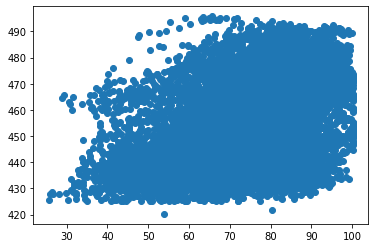

In [17]:
# draw a scatter plot diagram
# The x-axis represents RH, and the y-axis represents PE.
plt.scatter(data['RH'],data['PE'])

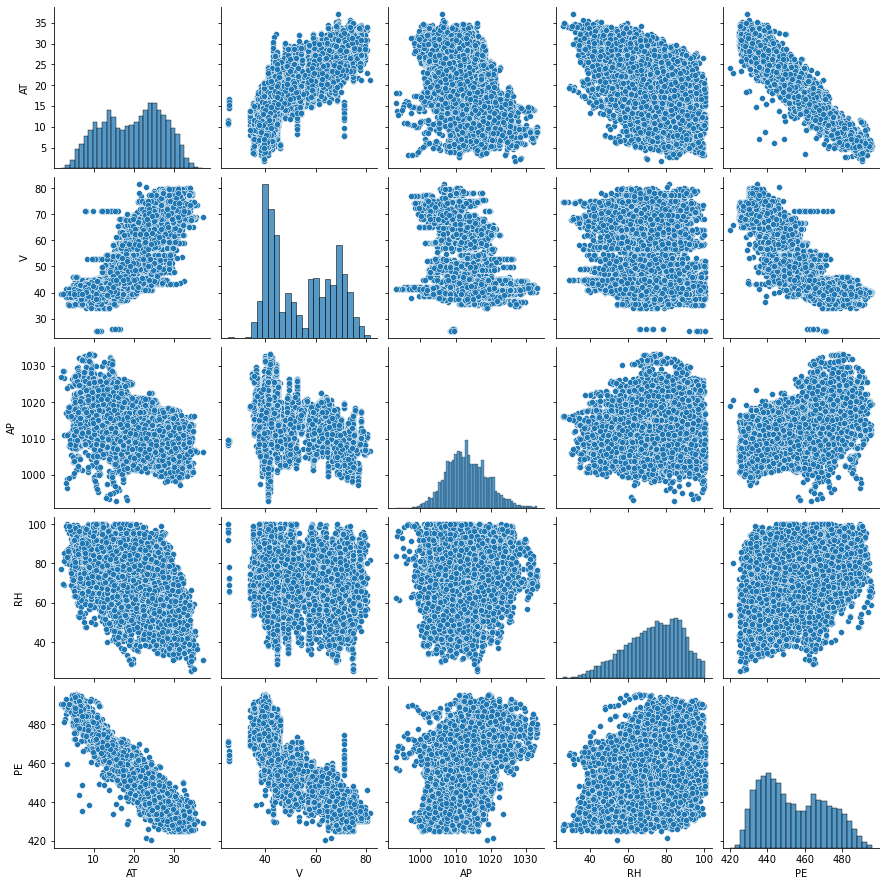

In [18]:
# The pairplot function creates a grid of Axes such that each variable
# in data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(data, diag_kind = 'hist')

In [19]:
# dividing the data into input and output
x=data.drop(['PE'],axis=1)
y=data['PE']

In [21]:
# importing the train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
# Returns size of xtrain 
xtrain.shape

(7654, 4)

In [13]:
# Returns size of xtest 
xtest.shape

(1914, 4)

In [14]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Initializing the model
LRmodel = LinearRegression()

In [15]:
# Train the data with Linear Regreesion model
LRmodel.fit(xtrain, ytrain)

LinearRegression()

In [16]:
LRpred=LRmodel.predict(xtest)

In [22]:
# Importing R Square library
from sklearn.metrics import r2_score

In [19]:
# Checking for accuracy score with actual data and predicted data
LRscore=r2_score(ytest, LRpred)
LRscore

0.9325315554761302

In [21]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
# Intializing the model
DTRmodel=DecisionTreeRegressor()

In [22]:
# Train the data with Linear Regreesion model
DTRmodel.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [23]:
DTRpred=DTRmodel.predict(xtest)

In [25]:
# Checking for accuracy score with actual data and predicted data
DTRscore=r2_score(ytest, DTRpred)
DTRscore

0.9224221478563223

In [26]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
RFmodel=RandomForestRegressor()

In [27]:
# Train the data with Random Forest model
RFmodel.fit(xtrain, ytrain)

RandomForestRegressor()

In [28]:
RFpred=RFmodel.predict(xtest)

In [29]:
# Checking for accuracy score with actual data and predicted data
RFscore=r2_score(ytest, RFpred)
RFscore

0.9647395938141367

In [31]:
# saving the model
pickle.dump(RFmodel, open('CCPP.pkl','wb'))